In [9]:
# -*- coding: utf-8 -*-
"""cnn_mnist_0_9.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1aq49uaQRCfAi4Q_UTP2kNfP1Dr81Az4i
"""
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import get_file
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from keras.utils import to_categorical

# 下載MNIST數據集
mnist_file = get_file('mnist.npz', origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz')
mnist = np.load(mnist_file)

# 數據預處理
train_images, train_labels = mnist['x_train'], mnist['y_train']
test_images, test_labels = mnist['x_test'], mnist['y_test']

# Const
data_len = 28
data_wid = 28
input_size = data_len * data_wid
output_size = 10
initial = 5
enternal = 9
input_layer = int(pow(2,initial))
filter_size = (3,3)
pooling_size = (2,2)
pooling_times = 2
flatten = int(np.sqrt(int(pow(2,enternal-1))))

# 數據預處理
train_images, test_images = train_images / 255.0, test_images / 255.0

# one-hot encoding
train_labels = to_categorical(train_labels, num_classes=output_size)
test_labels = to_categorical(test_labels, num_classes=output_size)

# repeat model
def layer(dim, size, input_dim, max_pool):
  global pooling_times
  if input_dim != None:
    model.add(Conv2D(dim, size, activation='relu', input_shape=input_dim))
  else:
    model.add(Conv2D(dim, size, activation='relu'))

  if max_pool != None and pooling_times > 0:
    pooling_times -= 1
    model.add(MaxPooling2D(max_pool))

# 構建DCNN模型
input_shape = (data_len, data_wid, 1)

model = models.Sequential()

layer(input_layer, filter_size, input_shape, pooling_size)
for i in range(initial+1, enternal):
  for j in range(1):
    layer(int(pow(2,i)), filter_size, None, pooling_size)

model.add(Flatten())
model.add(Dense(flatten, activation='relu'))
model.add(Dense(output_size, activation='softmax'))

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 1, 1, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 16)                  │           4,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 392,122 (1.50 MB)

 Trainable params: 392,122 (1.50 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 86s 713ms/step - accuracy: 0.6442 - loss: 1.0551 - val_accuracy: 0.9586 - val_loss: 0.1296
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 82s 699ms/step - accuracy: 0.9663 - loss: 0.1130 - val_accuracy: 0.9818 - val_loss: 0.0569
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 143s 706ms/step - accuracy: 0.9806 - loss: 0.0642 - val_accuracy: 0.9843 - val_loss: 0.0446
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 142s 712ms/step - accuracy: 0.9850 - loss: 0.0492 - val_accuracy: 0.9850 - val_loss: 0.0423
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 83s 704ms/step - accuracy: 0.9880 - loss: 0.0392 - val_accuracy: 0.9848 - val_loss: 0.0455
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 145s 734ms/step - accuracy: 0.9902 - loss: 0.0303 - val_accuracy: 0.9880 - val_loss: 0.0376
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 140s 715ms/step - accuracy: 0.9921 - loss: 0.0258 - val_accuracy: 0.9883 - val_loss: 0.0356
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 84s 711ms/step - accuracy: 0.9936 - los

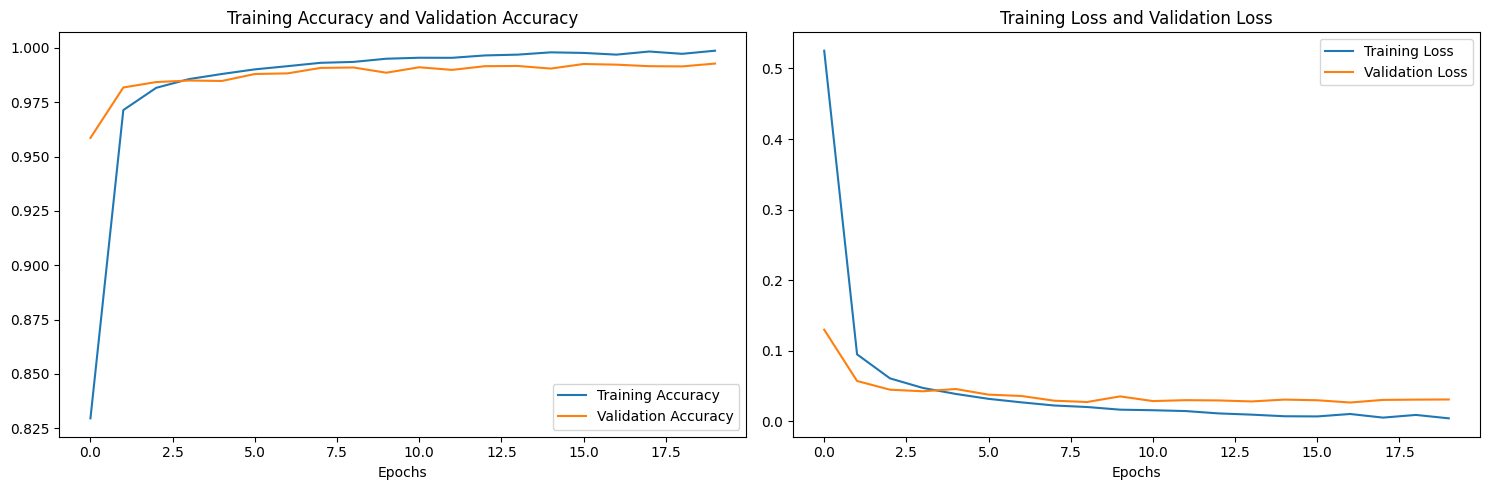

In [10]:
# TODO 訓練模型
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=20, batch_size=512)

# 創建一個具有兩個子圖的圖形
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 第一個子圖 - 訓練的損失和準確率變化
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_title('Training Accuracy and Validation Accuracy')
axes[0].legend()

# 第二個子圖 - 驗證的損失和準確率變化
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_title('Training Loss and Validation Loss')
axes[1].legend()

# 設置兩個子圖之間的間距
plt.tight_layout()

# 顯示圖形
plt.show()